# Exploring a datase of used cars from eBay Kleinanzeigen

## Introduction

In this short project, we clean a dataset of cars sold on eBay to prepare for a statistical analysis. 
Our main goals are: 
* to make the dataset usable for statistical analysis
* to determine the most popular and expensive brands.

## The dataset

The dataset we work with, downloaded from [Dataquest](https://app.dataquest.io/m/294/guided-project%3A-exploring-ebay-car-sales-data), is a modified version of a database scrapped by Orges Leka from Ebay-Kleinanzeigen, available on [Kaggle](https://www.kaggle.com/orgesleka/used-cars-database/data). The original dataset was created on 19 November 2016, last updated (at the time of writing) on 28 November 2016, and contains data of ads for more than 370000 used cars. The one we will use contains a subset of 50000 rows. 
For learning purposes, the data was made less clean than the original. 

It has 20 columns: 
* `dateCrawled`: date when the ad was crawled, 
* `name`: name of the car,
* `seller`: indicates whether the seller is private or a professional dealer,
* `offertype`: the type of listing,
* `price`: the price on the ad,
* `abtest`: whether the listing is included in an A/B test,
* `vehicleType`: the type of vehicle,
* `yearOfRegistration`: year when the vehicle was first registered,
* `gearbox`: the transmission type, 
* `powerPS`: power of the vehicle in PS (1PS $\approx$ 0.7355kW),
* `model`: the model of the vehicle,
* `kilometer` : how many kilometers the vehicle has driven,
* `monthOfRegistration`: month when the vehicle was first registered,
* `fuelType`: type of fuel used by the vehicle, 
* `brand`: the brand of the vehicle, 
* `notRepairedDamage`: whether the vehicle has some unrepaired damage, 
* `dateCreated`: creation date for the eBay listing, 
* `nrOfPictures`: supposedly the number of pictures in the ad, actually always 0 due to a bug, 
* `postalCode`: postal code for the location of the vehicle,
* `lastSeenOnline`: when the crawler saw the ad online last.

We first import the Pandas and NumPy libraries, which we will use extensively in this project.

In [1]:
import numpy as np
import pandas as pd

We then import the dataset as the Pandas dataframe `autos` and print basic information as well as its first 10 rows. By trial and errors, we found that the encoding is Latin-1. 

In [2]:
autos = pd.read_csv('../Data/autos.csv', encoding='Latin-1')
print(autos.info())
autos.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
5,2016-03-21 13:47:45,Chrysler_Grand_Voyager_2.8_CRD_Aut.Limited_Sto...,privat,Angebot,"$7,900",test,bus,2006,automatik,150,voyager,"150,000km",4,diesel,chrysler,NaN,2016-03-21 00:00:00,0,22962,2016-04-06 09:45:21
6,2016-03-20 17:55:21,VW_Golf_III_GT_Special_Electronic_Green_Metall...,privat,Angebot,$300,test,limousine,1995,manuell,90,golf,"150,000km",8,benzin,volkswagen,NaN,2016-03-20 00:00:00,0,31535,2016-03-23 02:48:59
7,2016-03-16 18:55:19,Golf_IV_1.9_TDI_90PS,privat,Angebot,"$1,990",control,limousine,1998,manuell,90,golf,"150,000km",12,diesel,volkswagen,nein,2016-03-16 00:00:00,0,53474,2016-04-07 03:17:32
8,2016-03-22 16:51:34,Seat_Arosa,privat,Angebot,$250,test,NaN,2000,manuell,0,arosa,"150,000km",10,NaN,seat,nein,2016-03-22 00:00:00,0,7426,2016-03-26 18:18:10
9,2016-03-16 13:47:02,Renault_Megane_Scenic_1.6e_RT_Klimaanlage,privat,Angebot,$590,control,bus,1997,manuell,90,megane,"150,000km",7,benzin,renault,nein,2016-03-16 00:00:00,0,15749,2016-04-06 10:46:35


This confirms that the dataset has 50000 rows and 20 columns. 15 of them seem to have string values, while the 5 columns `yearOfRegistration`, `powerPS`, `monthOfRegistration`, `nrOfPictures`, and `postalCode` have integer values. 

The information is in German and that some of the `vehicleType`, `gearbox`, `model`, `fuelType`, and `notRepairedDamage` are missing (but never more than 20%). Besides, some entries in the `powerPS` column are 0, which seems impossible. Another, minor, issue is that the column names use camelcase instead of snakecase, preferred in Python.

## Data cleaning

### Column names

We first want to delete the column `nrOfPictures`, which does not provide any information. 
Before that, we wheck that it indeed contains only the value 0.

In [3]:
autos['nrOfPictures'].value_counts()

0    50000
Name: nrOfPictures, dtype: int64

This column indeed contains only one value. 
We can thus delete it without losing information.

In [4]:
autos.drop('nrOfPictures', axis=1, inplace=True);

Let us then focus on the column names:

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen'],
      dtype='object')

Let us rewrite the column names in snakecase, translate `odometer` to the English `mileage`, and make some of them more explicit. We first define a function to convert camelcase strings to snakecase ones:

In [6]:
def camel_to_snake_char(c):
    '''
    returns c if c is not uppercase and '_'+c.lower() if it is
    c: char
    '''
    if c.isupper():
        return '_'+c.lower()
    else:
        return c  

def camel_to_snake(s):
    '''
    returns the snakecase version of the camelcase string s
    '''
    return ''.join([s[0]]+list(map(camel_to_snake_char, s[1:])))

We then give to four columns shorter names and put them all in snakecase:

In [7]:
autos.rename(columns={'yearOfRegistration':'registrationYear', 
                      'monthOfRegistration':'registrationMonth', 
                      'notRepairedDamage':'unrepairedDamage', 
                      'dateCreated':'adCreated',
                      'odometer':'mileage'}, inplace=True)
autos.columns = list(map(camel_to_snake, autos.columns))
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_p_s', 'model',
       'mileage', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'postal_code', 'last_seen'],
      dtype='object')

### Translation to English

To make the analysis easier, we translate the German words in the columns `seller`, `offer_type`, `vehicle_type`, `gearbox`, `fuel_type`, and `unrepaired_dammage` to English.

In [8]:
translations = {'privat': 'private', 'gewerblich': 'commercial', 
                'Angebot': 'offer', 'Gesuch': 'request', 
                'kleinwagen': 'small car', 'cabrio': 'convertible', 
                'manuell': 'manual', 'automatik': 'automatic', 
                'benzin': 'benzine', 'andere': 'other', 'electro': 'electric', 
                'nein': 'no', 'ja': 'yes'}
autos.replace(translations, inplace=True)

### Numerical columns

Let us now have a closer look at the resulting dataframe:

In [9]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_p_s,model,mileage,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,39481
top,2016-04-04 16:40:33,Ford_Fiesta,private,offer,$0,test,limousine,NaN,manual,NaN,golf,"150,000km",NaN,benzine,volkswagen,no,2016-04-03 00:00:00,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,71540.000000,NaN


We observe that:
* The columns `seller` and `offer_type` have only 2 different values each, with one value appearing only once. The different value may be an error, in which case the corresponding column offers no information and can be dropped.
* The `price` and `mileage` columns have numbers written as strings. We will want to convert them to numerical values. 

Let us deal with the first point and investigate the columns `seller` and `offer_type`:

In [10]:
print(autos['seller'].value_counts())
print(autos['offer_type'].value_counts())

private       49999
commercial        1
Name: seller, dtype: int64
offer      49999
request        1
Name: offer_type, dtype: int64


Actually, the two values present in each of these columns make sense. 
Let us see if, by any chance, they would be on the same line. 

In [11]:
# get the index of the first (and only) occurrence of 'gewerblich' in the 
# 'seller' column
sellers = autos['seller']
print(sellers[sellers=='commercial'].index[0])

# get the index of the first (and only) occurrence of 'Gesuch' in the 
# 'offer_type' column
sellers = autos['offer_type']
print(sellers[sellers=='request'].index[0])

7738
17541


They are actually not on the same row.

Let us now convert the two columns `price` and `mileage` to numeric values and include the units in their names:

In [12]:
autos['price'] = autos['price'].str.replace('$','').str.replace(',','').astype(int)
autos.rename(columns={'price':'price_$'}, inplace=True)
autos['mileage'] = autos['mileage'].str.replace('km','').str.replace(',','').astype(int)
autos.rename(columns={'mileage':'mileage_km'}, inplace=True)

Let us now explore these two columns. We start with `price_$`:

In [13]:
autos['price_$'].describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_$, dtype: float64

The minimum price is 0, which seems unrealistic. Let us see what are the few lowest and largest values: 

In [14]:
print(autos['price_$'].value_counts().sort_index().head())
print()
print(autos['price_$'].value_counts().sort_index(ascending=False).head())

0    1421
1     156
2       3
3       1
5       2
Name: price_$, dtype: int64

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
Name: price_$, dtype: int64


It seems that we have two problems here: some vehicles are surprisingly cheap (some even indicated as costing nothing!) while one of them has a much higher price than the others. The latter is an outlier, and we will remove it. The information on the very cheap vehicles is probably wrong. 
Let us do a bar plot of the prices, with intervals corresponding to powers of 10. 

In [15]:
import matplotlib.pyplot as plt

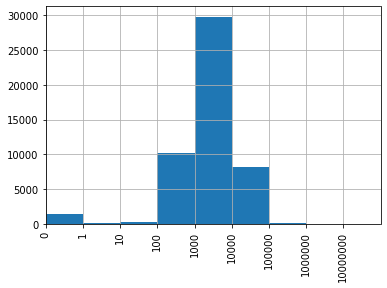

In [16]:
def power_ten(n):
    '''
    returns 0 if n = 0 or the largest power of ten smaller than or equal to n
    n: natural integer or positive float or 0 or nan.
    '''
    if np.isnan(n):
        return np.nan
    elif n==0:
        return 0
    else:
        return 10**(int(np.log(n)/np.log(10)))

power_ten_prices = autos['price_$'].apply(power_ten)
counts_prices = power_ten_prices.value_counts().sort_index()
ax = counts_prices.plot.bar(x='price ($)', y='count', width=1, align='edge', grid=True)
ax.set_xlim(0,len(counts_prices))
plt.show()

There are very few vehicles cheaper than \\$100 or more expensive than \\$1,000,000. 
Those seem to be outliers, and may indicate errors n the data.
Let us thus remove the price for vehicles indicated cheaper than \\$100 or more expensive than \\$1,000,000. 

In [17]:
price_min = 10**2
price_max = 10**6
autos.loc[-autos['price_$'].between(price_min,price_max),'price_$'] = np.nan
autos['price_$'].describe()

count     48227.000000
mean       5992.208099
std       11994.952272
min         100.000000
25%        1250.000000
50%        3000.000000
75%        7499.000000
max      999999.000000
Name: price_$, dtype: float64

Let us now deal with the column `mileage_km`:

In [18]:
autos['mileage_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: mileage_km, dtype: float64

It seems that most values are equal to 150,000. Let us see this more precisely: 

In [19]:
autos['mileage_km'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: mileage_km, dtype: int64

This column has only 13 unique values, and the value 150,000 is by far the most represented. However, the other values look fine.  

### Date columns

There are five columns with dates as entries: 
* `date_crawled`, added by the crawler, 
* `registration_year`, obtained from the website,
* `registration_month`, obtained from the website,
* `ad_created`, obtained from the website,
* `last_seen`, added by the crawler.

The columns `registration_year` and `registration_month` contain int values while the other three contain string values. 
Let us focus on the columns containing strings. 

In [20]:
autos[['date_crawled', 'ad_created', 'last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


It seems that the first 10 characters give the date in the year-month-day format. 
We now look at the distribution of day in percentage within each column, using the function `print_percent_dates` defined below:

In [21]:
def print_percent_dates(name_column):
    '''
    prints the frequency in % of each date appearing in the column name_column 
    of the dataset autos
    
    name_column: string 
    '''
    # normalize=True gives the proportion of each value
    # multiplying by 100 gives percentages
    # the dates are sorted in ascending order
    title = 'Dates in {}:\n'
    print(title.format(name_column))
    (autos[name_column].str[:10].value_counts(normalize=True, dropna=False).sort_index()*100).plot(rot=90, grid=True)
    print(autos[name_column].str[:10].value_counts(normalize=True, dropna=False).sort_index()*100)

We first apply it to the column `date_crawled`:

Dates in date_crawled:

2016-03-05    2.538
2016-03-06    1.394
2016-03-07    3.596
2016-03-08    3.330
2016-03-09    3.322
2016-03-10    3.212
2016-03-11    3.248
2016-03-12    3.678
2016-03-13    1.556
2016-03-14    3.662
2016-03-15    3.398
2016-03-16    2.950
2016-03-17    3.152
2016-03-18    1.306
2016-03-19    3.490
2016-03-20    3.782
2016-03-21    3.752
2016-03-22    3.294
2016-03-23    3.238
2016-03-24    2.910
2016-03-25    3.174
2016-03-26    3.248
2016-03-27    3.104
2016-03-28    3.484
2016-03-29    3.418
2016-03-30    3.362
2016-03-31    3.192
2016-04-01    3.380
2016-04-02    3.540
2016-04-03    3.868
2016-04-04    3.652
2016-04-05    1.310
2016-04-06    0.318
2016-04-07    0.142
Name: date_crawled, dtype: float64


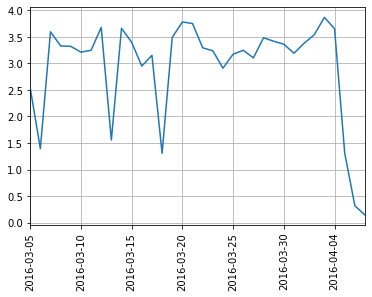

In [22]:
print_percent_dates('date_crawled')

Ads have been crawled every day from 05/03/2016 to 07/04/2016, at a nearly constant rate apart from three hollows on 06/03/2016, 13/03/2016, and 18/03/2016, and a sharply reduced rate during the last three days.

Let us now do the same for the column `ad_created`:

Dates in ad_created:

2015-06-11    0.002
2015-08-10    0.002
2015-09-09    0.002
2015-11-10    0.002
2015-12-05    0.002
2015-12-30    0.002
2016-01-03    0.002
2016-01-07    0.002
2016-01-10    0.004
2016-01-13    0.002
2016-01-14    0.002
2016-01-16    0.002
2016-01-22    0.002
2016-01-27    0.006
2016-01-29    0.002
2016-02-01    0.002
2016-02-02    0.004
2016-02-05    0.004
2016-02-07    0.002
2016-02-08    0.002
2016-02-09    0.004
2016-02-11    0.002
2016-02-12    0.006
2016-02-14    0.004
2016-02-16    0.002
2016-02-17    0.002
2016-02-18    0.004
2016-02-19    0.006
2016-02-20    0.004
2016-02-21    0.006
              ...  
2016-03-09    3.324
2016-03-10    3.186
2016-03-11    3.278
2016-03-12    3.662
2016-03-13    1.692
2016-03-14    3.522
2016-03-15    3.374
2016-03-16    3.000
2016-03-17    3.120
2016-03-18    1.372
2016-03-19    3.384
2016-03-20    3.786
2016-03-21    3.772
2016-03-22    3.280
2016-03-23    3.218
2016-03-24    2.908
2016-03-25    3.188
2016-03-26    3.25

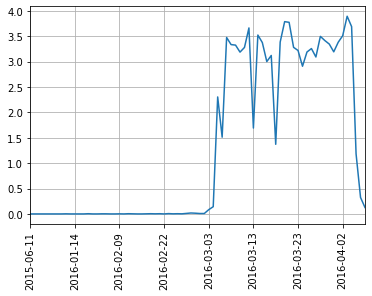

In [23]:
print_percent_dates('ad_created')

The range of dates is much longer, going from 11/06/2015 to 07/04/2016. 
However, the number of ads created before 03/2016 is very low. 
One possible reason is that most of the ads created before have been removed before the crawler was used. 
There is a sharp decrease in the number of apps created during the last three days.

We now do the same for the `last_seen` column: 

Dates in last_seen:

2016-03-05     0.108
2016-03-06     0.442
2016-03-07     0.536
2016-03-08     0.760
2016-03-09     0.986
2016-03-10     1.076
2016-03-11     1.252
2016-03-12     2.382
2016-03-13     0.898
2016-03-14     1.280
2016-03-15     1.588
2016-03-16     1.644
2016-03-17     2.792
2016-03-18     0.742
2016-03-19     1.574
2016-03-20     2.070
2016-03-21     2.074
2016-03-22     2.158
2016-03-23     1.858
2016-03-24     1.956
2016-03-25     1.920
2016-03-26     1.696
2016-03-27     1.602
2016-03-28     2.086
2016-03-29     2.234
2016-03-30     2.484
2016-03-31     2.384
2016-04-01     2.310
2016-04-02     2.490
2016-04-03     2.536
2016-04-04     2.462
2016-04-05    12.428
2016-04-06    22.100
2016-04-07    13.092
Name: last_seen, dtype: float64


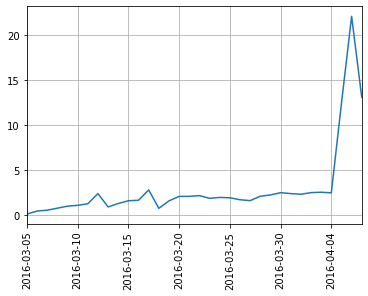

In [24]:
print_percent_dates('last_seen')

The range of dates is 05/03/2016 to 07/04/2016: the same as for the `date_crawled` column. 
The number of ads per day shows a slow increase followed by a sharp peak corresponding to the last three days.

We now describe the `registration_year` column; 

In [25]:
autos['registration_year'].describe()

count    50000.000000
mean      2005.073280
std        105.712813
min       1000.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

The minimum and maximum values are clearly wrong: there were no modern cars in year 1000 and the website can't have known about vehicles registered after 2016 at the time the crawler was used. 
We should remove the value for cars marked as registered after 2016, as these can't be accurate. 
We should also remove too early values. 
It is difficult to give a precise lower bound for the acceptable registration year. 
However from the heading of the section History of [this Wikipedia page](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_Germany#History) (seen on 22/10/2019 at 22:27 GMT), the first German license plates were issued in 1906. 
We shall thus remove all registration years smaller than 1906.

In [26]:
registration_year_max = 2016
registration_year_min = 1906
autos.loc[-autos['registration_year'].between(registration_year_min,registration_year_max),'registration_year'] = np.nan

Let us now look at the distribution of registration years: 

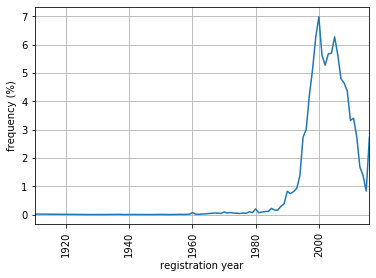

In [27]:
(autos['registration_year'].value_counts(normalize=True).sort_index()*100).plot(
    rot=90, grid=True)
plt.xlabel('registration year')
plt.ylabel('frequency (%)')
plt.show()

Most cars have been registered between 1990 and 2016. The year having seen the highest number of registrations is the year 2000. 
There is a drop in registrations after 2005, which may be due to the fact that cars sold online are second-hand, and thus typically older.

## Popular Brands

We now want to determine which brands are most popular, and what is the average price for cars of each of the 20 top brands.
We start by looking at which brands have the most ads: 

In [28]:
n_brands = 20 # number of brands to consider
print('Frequency (%) of each of the top {} brands:\n'.format(n_brands))
top_brands_freq = autos['brand'].value_counts(normalize=True)[:20]*100
print(top_brands_freq)
print()
print('Fraction of ads covered: {:.2f}%.'.format(top_brands_freq.sum()))

Frequency (%) of each of the top 20 brands:

volkswagen        21.374
opel              10.922
bmw               10.858
mercedes_benz      9.468
audi               8.566
ford               6.958
renault            4.808
peugeot            2.912
fiat               2.616
seat               1.882
skoda              1.572
mazda              1.514
nissan             1.508
citroen            1.402
smart              1.402
toyota             1.234
sonstige_autos     1.092
hyundai            0.976
volvo              0.914
mini               0.848
Name: brand, dtype: float64

Fraction of ads covered: 92.83%.


Volksvagen clearly dominates, with more than 20% of all ads. 
This is nearly twice the fraction of the second most popular brand, Opel. 
Opel, BMW, Mercedes-Benz, Audi, and Ford also cover more than 5% of ads each. 
The 20 most popular brand cover together more than 90% of all ads, so focusing on them seems to make sense.

We now compute the average price and its standard error for cars of each brand and store them in the `ave_price_by_brand` and `ste_price_by_brand` dictionnaries. 
We then print and plot the results.

Volkswagen: $5560±150
Opel: $2975±50
Bmw: $8310±135
Mercedes_benz: $8580±150
Audi: $9260±155
Ford: $4054±313
Renault: $2451±73
Peugeot: $3087±83
Fiat: $2816±85
Seat: $4349±154
Skoda: $6394±188
Mazda: $4075±178
Nissan: $4682±201
Citroen: $3784±146
Smart: $3538±87
Toyota: $5148±188
Sonstige_autos: $12576±1093
Hyundai: $5416±221
Volvo: $4912±264
Mini: $10567±293


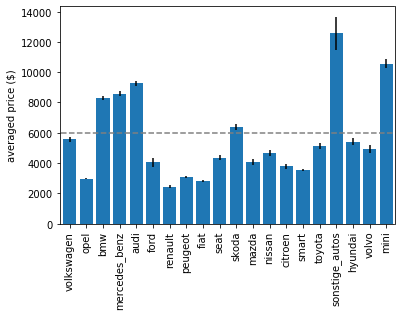

In [29]:
ave_price_by_brand = {} # average price by brand
ste_price_by_brand = {} # standard error
for brand in top_brands_freq.index: 
    # prices for this brand, selecting the rows where the price is not nan
    prices_brand = autos.loc[(autos['brand']==brand) & -(autos['price_$'].isnull()), 'price_$'] 
    ave_price_by_brand[brand] = prices_brand.mean()
    ste_price_by_brand[brand] = prices_brand.std()/np.sqrt(prices_brand.size)

# print the results
for brand in ave_price_by_brand: 
    ave_price = ave_price_by_brand[brand]
    ste_price = ste_price_by_brand[brand]
    print('{}: ${:.0f}±{:.0f}'.format(brand.capitalize(), ave_price, ste_price))
    
# plot the results as a bar plot
global_ave_price = autos['price_$'].mean() # averaged price over the whole dataset
plt.bar(range(len(ave_price_by_brand)), ave_price_by_brand.values(), yerr = ste_price_by_brand.values())
plt.xticks(range(len(ave_price_by_brand)), list(ave_price_by_brand.keys()), rotation=90)
plt.plot([-0.5,len(ave_price_by_brand)-0.5],[global_ave_price,global_ave_price], r'--', c=[0.5,0.5,0.5])
plt.xlim(-0.6,len(ave_price_by_brand)-0.5)
plt.ylabel('averaged price ($)')
plt.show()

The cheapest cars on average are those from Renault, and the most expensive ones by Sonstige Autos. 
The most popular brand, Volkswagen, has an average price close to the total average. 

### Sonstige Autos ads

The standard error for Sonstige Autos is particularly large. 
Let us try to see what is going on there:

In [30]:
autos.loc[(autos['brand']=='sonstige_autos') & -(autos['price_$'].isnull()), 'price_$'].describe()

count       455.000000
mean      12575.773626
std       23313.715862
min         100.000000
25%        2475.000000
50%        6995.000000
75%       14500.000000
max      345000.000000
Name: price_$, dtype: float64

This brand seems to have both very cheap and quite expensive cars. 
The average price is significantly larger than the median, and even larger than the 75th percentile. 
This seems to indicate that a few ads with a very large price drive the average up.

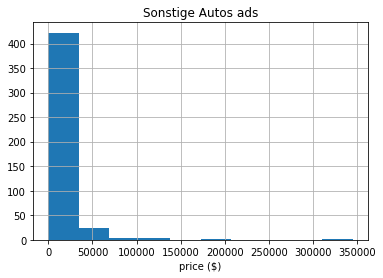

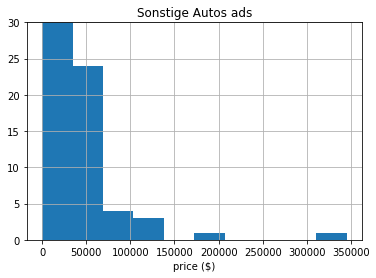

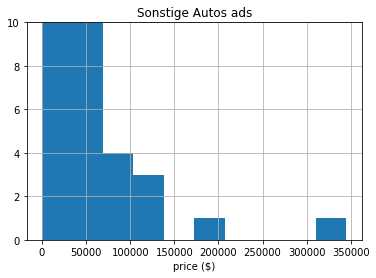

In [31]:
# histogram for the prices of the Sonstige Autos brand
autos.loc[(autos['brand']=='sonstige_autos') & -(autos['price_$'].isnull()), 'price_$'].hist()
plt.xlabel('price ($)')
plt.title('Sonstige Autos ads')
plt.show()

# a first zoomed-in picture
autos.loc[(autos['brand']=='sonstige_autos') & -(autos['price_$'].isnull()), 'price_$'].hist()
plt.ylim(0,30)
plt.xlabel('price ($)')
plt.title('Sonstige Autos ads')
plt.show()

# a second zoomed-in picture
autos.loc[(autos['brand']=='sonstige_autos') & -(autos['price_$'].isnull()), 'price_$'].hist()
plt.ylim(0,10)
plt.xlabel('price ($)')
plt.title('Sonstige Autos ads')
plt.show()

Two ads have a price above \\$150,000, and three more have a price between \\$100,000 and \\$150,000. 

Let us see what becomes of the averaged price and standard deviation when removing them:

In [32]:
autos.loc[(autos['brand']=='sonstige_autos') & (autos['price_$'] < 100000), 'price_$'].describe()

count      450.000000
mean     10785.728889
std      12794.251098
min        100.000000
25%       2415.000000
50%       6800.000000
75%      13900.000000
max      80000.000000
Name: price_$, dtype: float64

The mean and standard deviation remain large compared with those of other brands, although they drop significantly. 
This indicates that *the few very expensive cars have a significant contribution to the average price, but are not enough to explain the higher average price compared with most other brands*.

### Price and Mileage

Among the 6 top brands, BMW, Mercedes-Benz, and Audi cars are, on average, more expensive than the mean, while Opel and Ford cars are cheaper and Volkswagen ones are close to the mean. 
We want to understand if this is due to the brand themselves or if another feature of the ads, for instance the mileage, plays a role. 
To this end, let us first redo the above analysis for the mileage:

Volkswagen: $128955±374
Opel: $129299±507
Bmw: $132522±479
Mercedes_benz: $130886±532
Audi: $129644±593
Ford: $124132±680
Renault: $128224±764
Peugeot: $127352±949
Fiat: $117037±1178
Seat: $122062±1331
Skoda: $110948±1630
Mazda: $125132±1445
Nissan: $118979±1507
Citroen: $119765±1516
Smart: $100756±1593
Toyota: $115989±1683
Sonstige_autos: $87189±2461
Hyundai: $106783±2034
Volvo: $138632±1358
Mini: $89375±2136


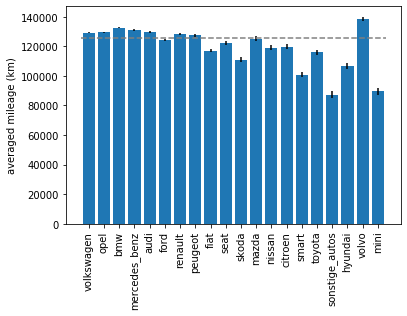

In [33]:
ave_mileage_by_brand = {} # average mileage by brand
ste_mileage_by_brand = {} # standard error
for brand in top_brands_freq.index: 
    # mileages for this brand, selecting the rows where the mileage is not nan
    mileages_brand = autos.loc[(autos['brand']==brand) & -(autos['mileage_km'].isnull()), 'mileage_km'] 
    ave_mileage_by_brand[brand] = mileages_brand.mean()
    ste_mileage_by_brand[brand] = mileages_brand.std()/np.sqrt(mileages_brand.size)

# print the results
for brand in ave_mileage_by_brand: 
    ave_mileage = ave_mileage_by_brand[brand]
    ste_mileage = ste_mileage_by_brand[brand]
    print('{}: ${:.0f}±{:.0f}'.format(brand.capitalize(), ave_mileage, ste_mileage))
    
# plot the results as a bar plot
global_ave_mileage = autos['mileage_km'].mean() # averaged price over the whole dataset
plt.bar(range(len(ave_mileage_by_brand)), ave_mileage_by_brand.values(), yerr = ste_mileage_by_brand.values())
plt.xticks(range(len(ave_mileage_by_brand)), list(ave_mileage_by_brand.keys()), rotation=90)
plt.plot([-0.5,len(ave_mileage_by_brand)-0.5],[global_ave_mileage,global_ave_mileage], r'--', c=[0.5,0.5,0.5])
plt.ylabel('averaged mileage (km)')
plt.show()

The average mileage for the six most popular brands is similar, although a bit larger for the most expensive ones. 
We conclude that **the difference in the price averages between the top brands does not seem to be explained by the mileage**. 
Notice, hovever, that ads for the Constige Autos and Mini brands show particularly small mileages. 
This *may contribute to explaining why cars from these brands are the most expensive*. 

To further explore the relations between price and mileage, let us plot the first as a function of the other.

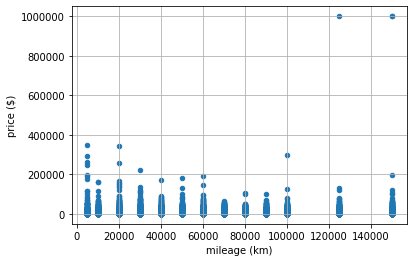

In [34]:
autos.plot.scatter('mileage_km', 'price_$')
plt.xlabel('mileage (km)')
plt.ylabel('price ($)')
plt.grid()
plt.show()

This plot does not show any clear connection. 
To get a more quantitative estimate, let us compute the correlation coefficient and its standard error using the external C file `correlation.c`. 

**(The cell below takes some time to run.)**

In [35]:
import correlation

corr_mil_pri = correlation.corr_and_error(autos, 'mileage_km', 'price_$')
print('r(mileage, price) = {:.2f} ± {:.2f}'.format(corr_mil_pri[0], corr_mil_pri[1]))

(-0.2931763345485996, 0.038921475533099055)

There is a *small but statistically significant negative correlation between the mileage and price*. 
Let us do the same analysis on a brand by brand basis.

In [39]:
for brand in top_brands_freq.index: 
    corr_mil_pri_brand = correlation.corr_and_error(autos[autos['brand']==brand], 'mileage_km', 'price_$')
    print('{}: r(mileage, price) = {:.2f} ± {:.2f}'.format(brand.capitalize(), corr_mil_pri_brand[0], corr_mil_pri_brand[1]))

Volkswagen: r(mileage, price) = -0.20 ± 0.12
Opel: r(mileage, price) = -0.51 ± 0.02
Bmw: r(mileage, price) = -0.48 ± 0.02
Mercedes_benz: r(mileage, price) = -0.51 ± 0.02
Audi: r(mileage, price) = -0.64 ± 0.02
Ford: r(mileage, price) = -0.14 ± 0.16
Renault: r(mileage, price) = -0.47 ± 0.04
Peugeot: r(mileage, price) = -0.58 ± 0.02
Fiat: r(mileage, price) = -0.55 ± 0.03
Seat: r(mileage, price) = -0.62 ± 0.03
Skoda: r(mileage, price) = -0.53 ± 0.03
Mazda: r(mileage, price) = -0.60 ± 0.03
Nissan: r(mileage, price) = -0.51 ± 0.03
Citroen: r(mileage, price) = -0.49 ± 0.04
Smart: r(mileage, price) = -0.66 ± 0.02
Toyota: r(mileage, price) = -0.52 ± 0.03
Sonstige_autos: r(mileage, price) = -0.19 ± 0.03
Hyundai: r(mileage, price) = -0.55 ± 0.03
Volvo: r(mileage, price) = -0.48 ± 0.06
Mini: r(mileage, price) = -0.70 ± 0.03


Among the top 6 brands, the negative correlation between mileage and price is quite strong for Opel, Bmw, Mercedes-Benz, and Audi, while it is weaker for Volkswagen and Ford.

### Effect of a non-repaired damage on the price

Let us now determine if the presence of an unrepaired damage has a significant influence on the price. 
To this end, we first compute the average price and standard error for vehicles with and without damage, and then compare them. 
We consider that the difference is statistically significant if the z-score is larger than 2.

In [58]:
ave_price_no_damage = autos.loc[autos['unrepaired_damage']=='no', 'price_$'].mean()
ste_price_no_damage = autos.loc[autos['unrepaired_damage']=='no', 'price_$'].sem()
ave_price_yes_damage = autos.loc[autos['unrepaired_damage']=='yes', 'price_$'].mean()
ste_price_yes_damage = autos.loc[autos['unrepaired_damage']=='yes', 'price_$'].sem()

print('Average price of a vehicle with no damage: ${:.0f}±{:.0f}'.format(ave_price_no_damage, ste_price_no_damage))
print('Average price of a vehicle with damage: ${:.0f}±{:.0f}'.format(ave_price_yes_damage, ste_price_yes_damage))

diff_price_ave = ave_price_no_damage - ave_price_yes_damage
ste_diff_price = np.sqrt(ste_price_no_damage**2 + ste_price_yes_damage**2)
print('z-score: {}'.format(diff_price_ave/ste_diff_price))

Average price of a vehicle with no damage: $7128±61
Average price of a vehicle with damage: $2466±222
z-score: 20.282944505692235


**Damages vehicles are, on average, more than twice cheaper than undamaged ones.** 
The difference is statistically significant, with a z-score of more than 20.

Let us now do the same on a brand by brand basis.

In [63]:
for brand in top_brands_freq.index: 
    ave_price_no_damage_brand = autos.loc[(autos['unrepaired_damage']=='no') & (autos['brand']==brand), 'price_$'].mean()
    ste_price_no_damage_brand = autos.loc[(autos['unrepaired_damage']=='no') & (autos['brand']==brand), 'price_$'].sem()
    ave_price_yes_damage_brand = autos.loc[(autos['unrepaired_damage']=='yes') & (autos['brand']==brand), 'price_$'].mean()
    ste_price_yes_damage_brand = autos.loc[(autos['unrepaired_damage']=='yes') & (autos['brand']==brand), 'price_$'].sem()

    diff_price_ave_brand = ave_price_no_damage_brand - ave_price_yes_damage_brand
    ste_diff_price_brand = np.sqrt(ste_price_no_damage_brand**2 + ste_price_yes_damage_brand**2)
    print('z-score for {}: {}'.format(brand.capitalize(), diff_price_ave_brand/ste_diff_price_brand))

z-score for Volkswagen: 2.696905622328091
z-score for Opel: 24.316100392072176
z-score for Bmw: 21.655832271476452
z-score for Mercedes_benz: 16.917849251529233
z-score for Audi: 24.967499113044347
z-score for Ford: 7.768040978307995
z-score for Renault: 13.503270871569248
z-score for Peugeot: 13.098466574787368
z-score for Fiat: 13.406721477616413
z-score for Seat: 10.576486718057923
z-score for Skoda: 6.4909856668099355
z-score for Mazda: 13.258088508962727
z-score for Nissan: 9.999158786378667
z-score for Citroen: 6.500878617528766
z-score for Smart: 12.60836332559741
z-score for Toyota: 4.459028121396576
z-score for Sonstige_autos: 4.157181974074665
z-score for Hyundai: 8.106432482259677
z-score for Volvo: 8.684946828822111
z-score for Mini: 11.401457455872857


**For each of the top brands, damaged vehicles are cheaper than undamaged ones and te difference is statistically significant.**

## Conclusion

In this project, we have cleaned and briefly studied ads for second-hand vehicles on the German eBay website. 
Our main findings are: 
* the brand Volkswagen has, by far, the largest number of ads, 
* cars from the brand Sonstige Autos are, on average, the most expensive ones,
* there are strong variations in the average price between brands, 
* for cars of a given brand, the presence of unrepaired damage  is an important factor in the price, 
* for cars of a given brand, the mileage is also a factor, although the correlation with the price is not very large.

This suggests that someone wishing to sell their car should first have any damage repaired and determine, within cars of the same brand, the typical price given the mileage. 
(One possibility would be to take the averaged price for cars of this brand with no damage and the closest mileage.)